In [138]:
# @title Section # 1 : Data Preprocessing
import pandas as pd

file_path="/content/drive/MyDrive/StudentsPerformance.csv"
df= pd.read_csv(file_path)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [139]:
#check shape
df.shape

(1000, 8)

In [140]:
#check data types and null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


OBSERVATION:

Invalid Data Types : none

Missing Values     : none

In [141]:
# Check data types

print("\nData Types:")
print(df.dtypes)


Data Types:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [142]:
#drop unnecessary columns

# Drop reading score and writing score columns from the DataFrame
df = df.drop(columns=['reading score', 'writing score'])


EXPLANATION:

Since reading score and writing score are themselves outcome variables closely related to academic performance, including them as predictors would make the model less realistic and potentially leak information about the target variable. This can lead to overly optimistic model performance that doesn’t generalize well.

OBSERVATION:

All data types seem correct

In [143]:
# @title Classification of Numerical Continuous, Numerical Discrete and Categorical Variables
# Display the number of unique values for each column
unique_counts = df.nunique()
print(unique_counts) #score columns are continuous


gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
dtype: int64


OBSERVATION:

numerical (continuous) : math score, readng score, writing score

categorical: gender, race/ethncity, parental level of education, lunch, test preperation score (we will categorize these as nomnal/ordinal later)

In [144]:
# Show unique values for each column
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 40)   #all good


Column: gender
['female' 'male']
----------------------------------------
Column: race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
----------------------------------------
Column: parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
----------------------------------------
Column: lunch
['standard' 'free/reduced']
----------------------------------------
Column: test preparation course
['none' 'completed']
----------------------------------------
Column: math score
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
----------------------------------------


OBSERVATION:

No odd or repetitive unique values found.

In [145]:
# @title Duplicates
# duplicate in data set
df.duplicated().sum()

np.int64(57)

OBSERVATION:

No duplicates found

In [146]:
# @title Missing Values
#overview of missing values

df.isnull().sum()


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0


OBSERVATION:

No missing values found


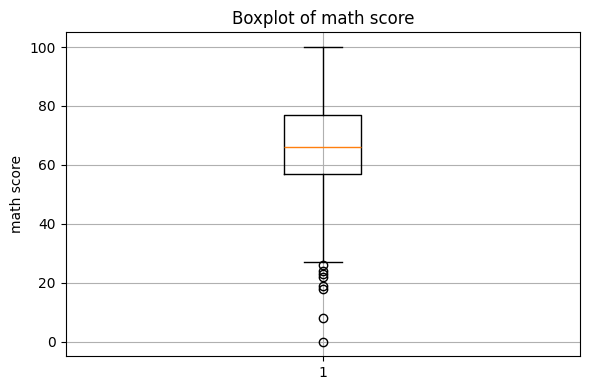

In [147]:
# @title Outliers Detection
import matplotlib.pyplot as plt

continuous_cols = ['math score']

# Plot boxplots in a loop
for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

OBSERVATION:

Outliers detected in math score so we need to cap them.

In [149]:
# fix outliers

# Calculate IQR
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Cap outliers
df['math score'] = df['math score'].clip(lower=lower_bound, upper=upper_bound)




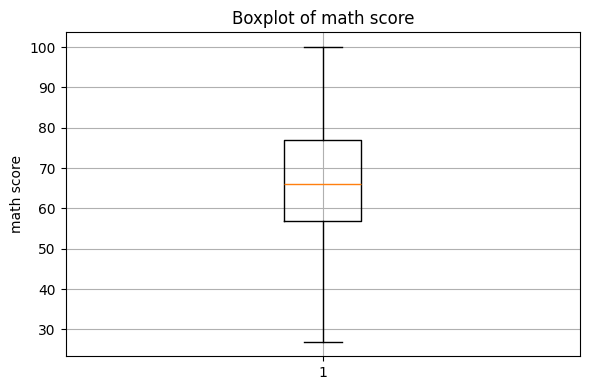

In [150]:
# verify outliers

#Verify


import matplotlib.pyplot as plt

temp_meal_cols = ['math score']

# Plot boxplots in a loop
for col in temp_meal_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [151]:
# encode categorical features

categorical_cols = df.select_dtypes(exclude=['number'])
print(categorical_cols)


     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  
0                      none  
1                 completed  
2                      none  
3              

OBSEVATION:

we classify categorical data as:


nominal : gender, race/thnicity, lunch    -> one-hot encoding

ordinal : parental level of education, test preparation course   ->label encoding



In [152]:
# @title Encoding Catergorical Variables
# nominal : gender, race/thnicity, lunch                           -> one-hot encoding
# ordinal : parental level of education, test preparation course   ->label encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

nominal_features=['gender', 'race/ethnicity', 'lunch']
ordinal_features=['parental level of education', 'test preparation course']

# Define order for ordinal encoding
education_order = [
    'some high school', 'high school', 'some college',
    "associate's degree", "bachelor's degree", "master's degree"
]
prep_course_order = ['none', 'completed']

# Create encoders
preprocessor = ColumnTransformer(transformers=[
    ('ordinal', OrdinalEncoder(categories=[education_order, prep_course_order]), ordinal_features),
    ('nominal', OneHotEncoder(drop='first'), nominal_features)
])

EXPLANATION:

We have one-hot encoded the nominal features and label encoded the ordinal features.

In [153]:
# Save the target variable
target = df['math score']

# Fit and transform only the features
X_encoded = preprocessor.fit_transform(df)

# Get encoded feature names
encoded_feature_names = (
    ordinal_features +
    preprocessor.named_transformers_['nominal'].get_feature_names_out(nominal_features).tolist()
)

# Reassign df to the new encoded DataFrame
df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# Add back the target
df['math score'] = target


In [154]:
df.head()

,parental level of education,test preparation course,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,math score
0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,72
1,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,69
2,5.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,90
3,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,47
4,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,76


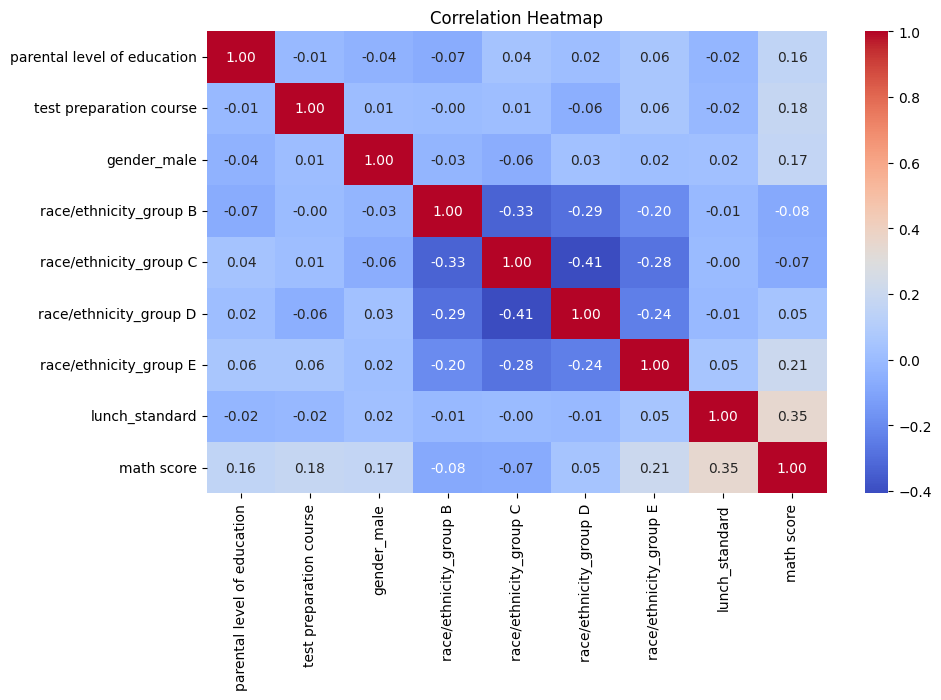

In [155]:
# @title Multilinear Regression
#correlation matrix to see which independent features influence the output feature
# Correlation matrix

import seaborn as sns

corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [156]:

# Calculate correlation matrix
corr = df.corr()

# Print correlation matrix in text form
print("Correlation Matrix:\n")
print(corr.round(2))  # Rounded to 2 decimals for neatness


Correlation Matrix:

                             parental level of education  \
parental level of education                         1.00   
test preparation course                            -0.01   
gender_male                                        -0.04   
race/ethnicity_group B                             -0.07   
race/ethnicity_group C                              0.04   
race/ethnicity_group D                              0.02   
race/ethnicity_group E                              0.06   
lunch_standard                                     -0.02   
math score                                          0.16   

                             test preparation course  gender_male  \
parental level of education                    -0.01        -0.04   
test preparation course                         1.00         0.01   
gender_male                                     0.01         1.00   
race/ethnicity_group B                         -0.00        -0.03   
race/ethnicity_group C           

OBSERVATIONS ABOUT CORRELATION MATRIX:

The feature lunch_standard shows the highest correlation with math score at 0.35, which is still considered a weak to modest positive relationship. This suggests that students with standard lunch tend to perform somewhat better in math compared to those with free/reduced lunch, but the effect is not very strong.
Parental level of education, test preparation course, and gender_male have weak positive correlations with math scores (around 0.16 to 0.18). These features have some predictive value but are not strong indicators on their own.
The various race/ethnicity groups show very weak or negligible correlations with math scores, ranging roughly between -0.08 and 0.21. These features have little predictive power individually.

Multicollinearity among features:
There are moderate negative correlations among race/ethnicity groups (e.g., group B vs group C: -0.33).
This is expected because these are one-hot encoded categorical variables representing mutually exclusive categories.
Apart from that, correlations between other independent variables are mostly low (close to zero), which is good — it suggests less risk of multicollinearity problems.

CONCLUSION ABOUT CORRELATION MATRIX:

While lunch_standard has the highest correlation, it still explains a small portion of the variance in math scores. Thus, socioeconomic factors like lunch status and parental education only modestly relate to math performance in this dataset.

Test preparation and gender show weak associations, suggesting these factors contribute somewhat but are far from decisive.

Race/ethnicity appears to have minimal impact when considered individually, indicating other variables may better explain differences in math scores.



In [157]:
# @title Feature Engineering


Multilinear Regression Performance:
RMSE: 13.578
MAE: 10.987
R² Score: 0.185
----------------------------------------
Polynomial Regression Performance:
RMSE: 13.938
MAE: 11.225
R² Score: 0.141
----------------------------------------


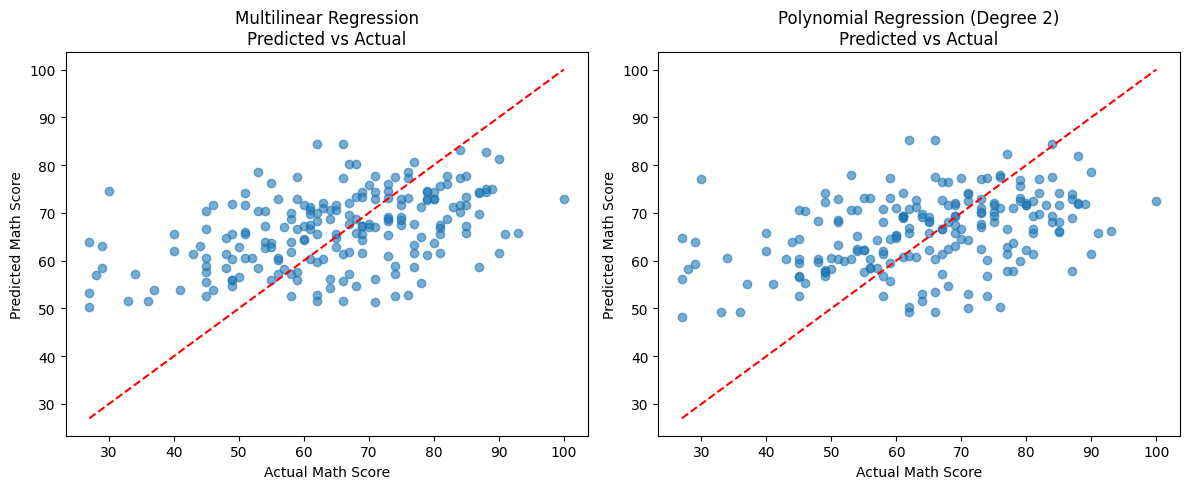

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming df is your encoded DataFrame including math score
# Feature columns exactly as in your encoded df:
feature_cols = [
    'parental level of education',
    'test preparation course',
    'gender_male',
    'race/ethnicity_group B',
    'race/ethnicity_group C',
    'race/ethnicity_group D',
    'race/ethnicity_group E',
    'lunch_standard'
]

X = df[feature_cols]
y = df['math score']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multilinear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

# Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # corrected here
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"R² Score: {r2:.3f}")
    print("-" * 40)


evaluate_model(y_test, y_pred_lin, "Multilinear Regression")
evaluate_model(y_test, y_pred_poly, "Polynomial Regression")

# Plot predicted vs actual
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Multilinear Regression\nPredicted vs Actual")
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Polynomial Regression (Degree 2)\nPredicted vs Actual")
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")

plt.tight_layout()
plt.show()


FEATURE SELECTION:

For both Multilinear and Polynomial Regression, we selected features based on their correlation with the math score and their relevance in the dataset. These included parental level of education, test preparation course, gender, lunch status, and race/ethnicity groups. For Multilinear Regression, these features were used directly after standardization. For Polynomial Regression, the same features were transformed into polynomial features (degree 2) to capture potential nonlinear relationships and interactions, aiming to improve model performance.

VISUALIZATION:
PROS:
Prediction Trend: Both plots generally show an upward trend, indicating that higher actual scores tend to lead to higher predicted scores — that’s good.
Reference Line (y = x): The red dashed line (ideal prediction line) is correctly plotted — it helps visualize how far off the predictions are from actual values.
Scatter Distribution: The scatter plots show some correlation, which is expected. Polynomial regression appears to have a slightly tighter fit near the line, especially for mid-range scores.

CONS:
Underfitting in Multilinear Regression:
The predictions seem biased toward the mean. Many actual scores above 80 are predicted around 70.
clustering around the mean is typical of a model that's not capturing enough complexity — possibly underfitting.
Polynomial Model Slightly Better but Still Biased:
There’s slightly better dispersion in the polynomial regression plot, especially in mid-to-high score ranges.
However, some high scores are still underestimated, and low scores overestimated.

INSIGHTS:

1. Low R² scores (~0.12) mean the models explain only about 12% of the variance in your target variable.
This is pretty low, indicating your models (linear, polynomial, standardized polynomial) are not capturing the underlying patterns well.

2. Similar MAE (~11.5) and RMSE (~14) values across all models show no significant improvement from polynomial or standardization.
Standardizing and adding polynomial terms didn’t boost predictive performance meaningfully.

3. Possible causes:
The relationships between features and target might be more complex/non-linear than polynomial degree 2 can model.

Important features might be missing or not well represented in the dataset.

4. What to do next:
Try more powerful nonlinear models like Random Forest, Gradient Boosting, or Support Vector Regression.

Summary:
current models show very limited predictive power, so it’s time to explore more advanced algorithms and/or better feature engineering to improve the fit.

In [159]:
# @title OVERFITTING VS UNDERFITTING IN POLYNOMIAL REGRESSION
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on training data
y_train_pred_poly = poly_reg.predict(poly.transform(X_train_scaled))


# Calculate training errors
train_rmse_poly = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
train_r2_poly = r2_score(y_train, y_train_pred_poly)

# Calculate testing errors
test_rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
test_r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression Training RMSE: {train_rmse_poly:.3f}")
print(f"Polynomial Regression Testing RMSE: {test_rmse_poly:.3f}")
print(f"Polynomial Regression Training R²: {train_r2_poly:.3f}")
print(f"Polynomial Regression Testing R²: {test_r2_poly:.3f}")

# Interpretation:
if train_rmse_poly < test_rmse_poly and (test_rmse_poly - train_rmse_poly) > 1:
    print("Likely Overfitting: Training error is much lower than testing error.")
elif train_rmse_poly > test_rmse_poly:
    print("Unusual case: Training error is higher than testing error.")
else:
    print("Likely Underfitting or Good Fit: Training and testing errors are close.")


Polynomial Regression Training RMSE: 12.662
Polynomial Regression Testing RMSE: 13.938
Polynomial Regression Training R²: 0.274
Polynomial Regression Testing R²: 0.141
Likely Overfitting: Training error is much lower than testing error.


Polynomial Regression Analysis:

The polynomial regression model shows signs of overfitting. The training RMSE (12.662) is lower than the testing RMSE (13.938), and the training R² (0.274) is higher than the testing R² (0.141). This indicates that the model fits the training data well but performs worse on unseen data, suggesting it captures noise or overly complex patterns that do not generalize. To improve, regularization or simpler models should be considered.

CONCLUSION:


Multilinear Regression showed modest predictive performance with an R² around 0.185, indicating a limited but positive relationship between the selected features and math scores.

Polynomial Regression achieved slightly lower test performance (R² ~ 0.141) but higher training accuracy (R² ~ 0.274), signaling overfitting where the model captures noise in training data but struggles to generalize.

Multilinear Regression performs slightly better across all metrics:

Lower RMSE and MAE indicate it makes smaller errors on average.
Higher R² (though still low) means it explains slightly more variance in the data.
Both models perform poorly overall:
R² below 0.2 suggests very limited explanatory power — most of the variability in math scores isn't being captured.
High error values (MAE ~11, RMSE ~13.5) relative to the scale of math scores (0–100) further confirm weak predictive accuracy.

